## Keras and TensorFlow

In this assignment, we will learn about Keras and TensorFlow. We will create a neural network and measure the model's performance.

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv')

In [41]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We'll start with some data cleaning. First remove the id column since we have no use for it. Then check for missing data and remove all rows containing missing data.

In [43]:
# Answer below:
cancer = cancer.drop('id', 1)

In [44]:
cancer.isnull().sum().sort_values(ascending=False)

fractal_dimension_worst    0
area_se                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
smoothness_se              0
symmetry_worst             0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
diagnosis                  0
dtype: int64

The diagnosis columnn is our target variable. How many possible values are in this variable?

In [45]:
# Answer below:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Create one or multiple dummy variables for this column and store this encoded data in a numpy array called `target`

In [46]:
# Answer below:
cancer['target'] = np.where(cancer['diagnosis'] == 'M', 1, 0)

In [47]:
cancer.target.value_counts()

0    357
1    212
Name: target, dtype: int64

When looking at the columm names, you may have noticed that for each attribute we have a mean of the attribute, a standard error, and a worst value. Let's create a list of column names for only the means columns. Use this list to create a new dataframe containing only the means columns.

In [48]:
# Answer below:
mean_cols = list(cancer.filter(regex='mean').columns)
cancer_means = cancer[mean_cols]
cancer_means

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


Split the data into train and test samples. The test sample should contain 20% of the data.

In [49]:
# Answer below
X_train, X_test, y_train, y_test = train_test_split(cancer_means, cancer['target'], test_size=0.2)

Now we'll use the minmax scaler to ensure that all columns have values between zero and 1. Apply this transformations for all columns to be used in the prediction.

In [50]:
# Answer below:
scaler = MinMaxScaler()

X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns=mean_cols)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=mean_cols)

Now we can proceed with our model. In the cell below, import the `Sequential`, and `Dense` functions.

create a model that takes the training data and predicts the target variable. The model will have 3 layers. The input layer should be of unit size 12 and the hidden layer will be of size 10. The output layer size will be determined by the size of the target variable. Use the sigmoid activation function for the last layer

In [51]:
# Answer below
model = Sequential()

model.add(Dense(12, input_dim=10))

model.add(Dense(10))

model.add(Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Use the adam optimizer and the binary crossentropy loss function. Train the model for 200 epochs with a batch size of 80. Make sure touse the test data into the model as well.

In [53]:
# Answer below:
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [54]:
model.fit(X_train, y_train, 
          validation_data = (X_test, y_test),
          batch_size=80, epochs=200, verbose=0)

Report the accuracy of the test sample.

In [55]:
# Answer below:
score = model.evaluate(X_test_sc, y_test, verbose=0)
print(f'Test score: {score[0]}\n Test accuracy: {score[1]}')


Test score: 0.46160849928855896
 Test accuracy: 0.8859649300575256


#Lecture Notes

In [19]:
from tensorflow.keras.datasets import mnist

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [22]:
X_train[0].shape

(28, 28)

In [23]:
y_train[0]

5

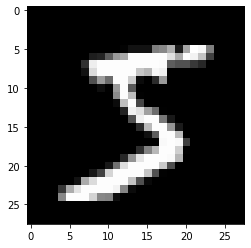

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')

In [25]:
input_dim = 784 #28x28

output_dim = num_classes = 10 #number of classes 0-9

batch_size = 128
num_epochs = 20

In [26]:
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000, input_dim).astype('float32')

In [27]:
X_train /= 255
X_test /= 255

In [28]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test= to_categorical(y_test, num_classes)

In [29]:
model = Sequential()

# model.add(Dense(1028, input_shape=(784,), activation='relu'))
model.add(Dense(1028, input_dim=784, activation='relu'))

model. add(Dense(1028, activation='relu'))

model.add(Dense(output_dim, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1028)              806980    
_________________________________________________________________
dense_4 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [32]:
history = model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size=batch_size, epochs=num_epochs, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5333 - accuracy: 0.6389 - val_loss: 0.4999 - val_accuracy: 0.8803
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4631 - accuracy: 0.8837 - val_loss: 0.3611 - val_accuracy: 0.9030
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3644 - accuracy: 0.8996 - val_loss: 0.3111 - val_accuracy: 0.9142
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.9121 - val_loss: 0.2832 - val_accuracy: 0.9203
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.9174 - val_loss: 0.2671 - val_accuracy: 0.9255
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2675 - accuracy: 0.9244 - val_loss: 0.2482 - val_accuracy: 0.9294
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2492 - accuracy: 0.9289 - val_loss: 0.2338 - val_accuracy: 0.9346
Epoch 

In [33]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.044430,0.777817,0.499890,0.8803
1,0.432421,0.888150,0.361103,0.9030
2,0.346890,0.904833,0.311130,0.9142
3,0.307971,0.913633,0.283175,0.9203
4,0.282486,0.920067,0.267146,0.9255


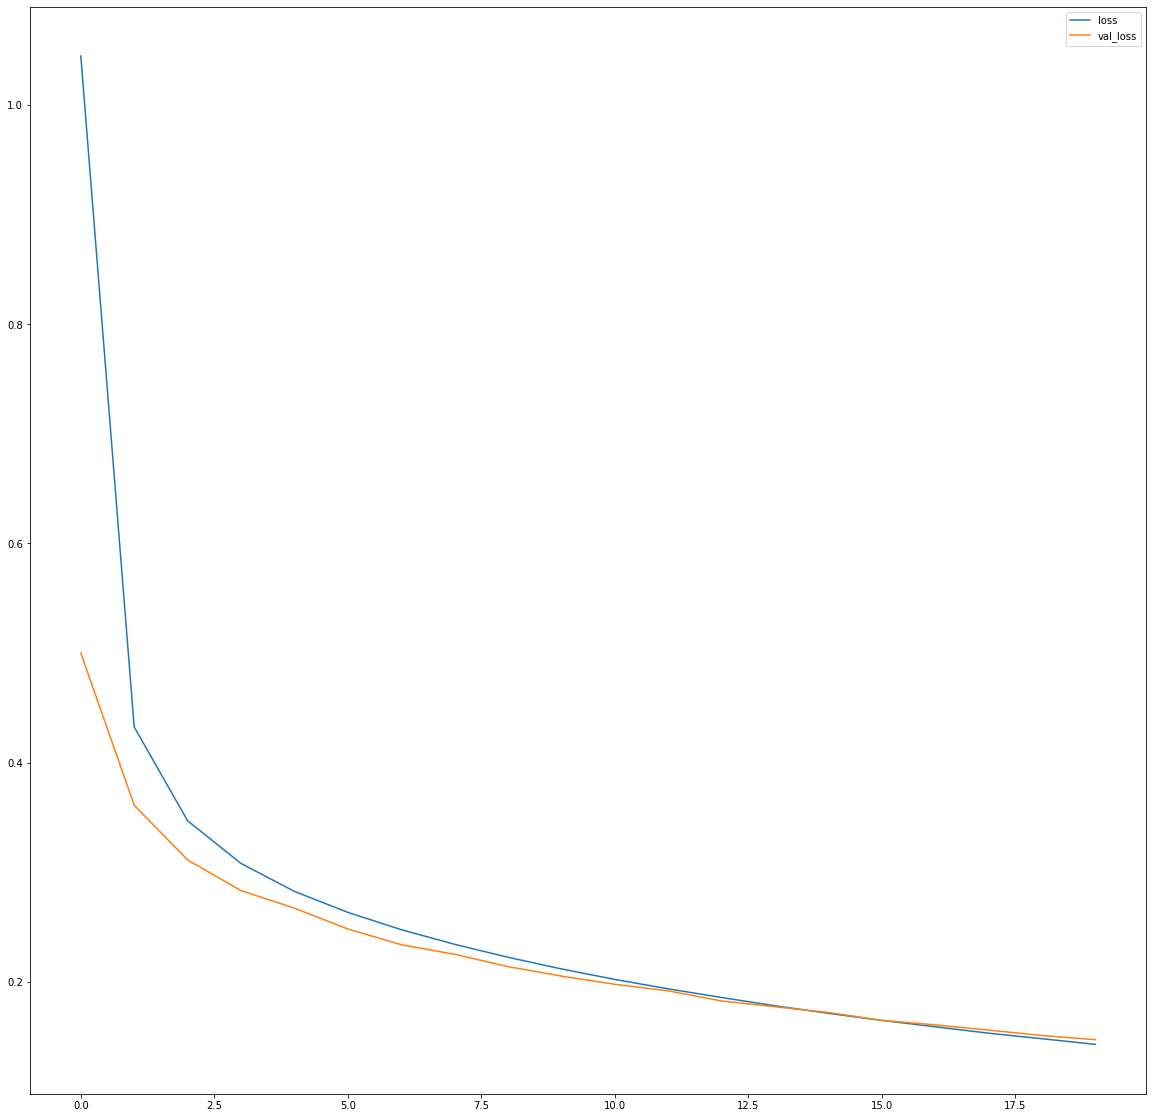

In [34]:
hist_df[['loss', 'val_loss']].plot(figsize=(20,20))

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test score: {score[0]}\n Test accuracy: {score[1]}')

Test score: 0.14717566967010498
 Test accuracy: 0.9560999870300293


In [36]:
model.predict_classes(X_test)[0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


7

In [37]:
np.argmax(model.predict(X_test), axis=-1)[0]

7

In [38]:
# need original y_test

# y_pred = np.argmax(model.predict(X_test), axis=-1)

# pred_df = pd.DataFrame({'y_true':y_test, 'y_pred':y_pred}) 